# Librerias y Frameworks Usados

In [32]:
# Bibliotecas utilizadas

import pandas as pd  # Biblioteca para trabajar con datos tabulares
import numpy as np   # Trabajar con matrices y vectores
import time          # Para medir tiempo

# Bibliotecas para generar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split   # Separación de dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler        # Escalonador

# Algoritmos de Regresión
from sklearn.linear_model import LinearRegression   # Regresión Lineal
from sklearn.linear_model import Ridge, RidgeCV     # Regresión Rige
from sklearn.linear_model import Lasso, LassoCV     # Regresión Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb


# Validación cruzada
from sklearn.model_selection import KFold            # Para separar los datos en k folds
from sklearn.model_selection import cross_validate   # Para correr el entrenamiento y test sobre kfolds
from sklearn import preprocessing          # Ayuda en la transformación de los datos
from sklearn.pipeline import make_pipeline # Permite realizar uma secuencia de procesos
from sklearn.metrics import get_scorer_names

# Métricas de desempeño
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score       # Métricas de Regresión
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.metrics import confusion_matrix, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE,RFECV


# Algotirmos de Clasificación
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import shap
from yellowbrick.regressor import PredictionError

# Fuciones

## Parametros

In [33]:

def score_summary_test(names, classifiers):
    cols = ["Clasificador", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(x_train_scaled, y_train)
        pred = clf.predict(x_test_scaled)
        accuracy = accuracy_score(y_test, pred)

        # Usar predict_proba si está disponible, de lo contrario usar decision_function
        if hasattr(clf, "predict_proba"):
            pred_proba = clf.predict_proba(x_test_scaled)[:, 1]
        else:
            pred_proba = clf.decision_function(x_test_scaled)
            pred_proba = (pred_proba - pred_proba.min()) / (pred_proba.max() - pred_proba.min())  # Escalar de 0 a 1

        fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
        roc_auc = auc(fpr, tpr)

        # Confusion matrix, cm
        cm = confusion_matrix(y_test, pred)

        # Recall: TP/(TP+FN)
        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

        # Precision: TP/(TP+FP)
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

        # F1 score: 2*recall*precision/(recall + precision)
        f1 = 2 * recall * precision / (recall + precision)

        df = pd.DataFrame([[name, accuracy * 100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)

    return np.round(data_table, 2)



# Para La validación

def score_summary_val(names, classifiers):
    cols = ["Clasificador", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(x_train_scaled, y_train)
        pred = clf.predict(x_val_scaled)
        accuracy = accuracy_score(y_val, pred)

        # Usar predict_proba si está disponible, de lo contrario usar decision_function
        if hasattr(clf, "predict_proba"):
            pred_proba = clf.predict_proba(x_val_scaled)[:, 1]
        else:
            pred_proba = clf.decision_function(x_val_scaled)
            pred_proba = (pred_proba - pred_proba.min()) / (pred_proba.max() - pred_proba.min())  # Escalar de 0 a 1

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        # Confusion matrix, cm
        cm = confusion_matrix(y_val, pred)

        # Recall: TP/(TP+FN)
        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

        # Precision: TP/(TP+FP)
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

        # F1 score: 2*recall*precision/(recall + precision)
        f1 = 2 * recall * precision / (recall + precision)

        df = pd.DataFrame([[name, accuracy * 100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)

    return np.round(data_table, 2)


## Curvas ROC

In [34]:

def roc_auc_curve_test(names, classifiers):
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(x_train_scaled, y_train)

        # Usar predict_proba si está disponible, de lo contrario usar decision_function
        if hasattr(clf, "predict_proba"):
            pred_proba = clf.predict_proba(x_test_scaled)[:, 1]
        else:
            pred_proba = clf.decision_function(x_test_scaled)
            pred_proba = (pred_proba - pred_proba.min()) / (pred_proba.max() - pred_proba.min())  # Escalar de 0 a 1

        fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))

    plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Falso Positivo')
    plt.ylabel('Verdadero Positivo')
    plt.title('Curva ROC Para Datos de Testeo', fontsize=20)
    plt.legend(loc="lower right")
    plt.show()


def roc_auc_curve_val(names, classifiers):
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(x_train_scaled, y_train)

        # Usar predict_proba si está disponible, de lo contrario usar decision_function
        if hasattr(clf, "predict_proba"):
            pred_proba = clf.predict_proba(x_val_scaled)[:, 1]
        else:
            pred_proba = clf.decision_function(x_val_scaled)
            pred_proba = (pred_proba - pred_proba.min()) / (pred_proba.max() - pred_proba.min())  # Escalar de 0 a 1

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))

    plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Falso Positivo')
    plt.ylabel('Verdadero Positivo')
    plt.title('Curva ROC Para Datos de Validación', fontsize=20)
    plt.legend(loc="lower right")
    plt.show()


## Matriz de Confusión

In [35]:
'''
    Argumentos:
    names: lista de nombres del clasificador
    classifiers: lista de algoritmos de clasificación (en tuplas)
    nrows, ncols: número de filas y columnas en los subplots
    fig_a, fig_b: dimensiones del tamaño de la figura
    '''

def plot_conf_matrix_test(names, classifiers, nrows, ncols, fig_a, fig_b):

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    fig.suptitle('Matrices de Confusión para el Test', fontsize=25)

    for name, clf, ax in zip(names, classifiers, axes.flatten()):

        clf.fit(x_train_scaled, y_train)
        predic = clf.predict(x_test_scaled)
        confusion_mat = confusion_matrix(y_true=y_test, y_pred=predic, labels=[1, 0])
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['1', '0'])
        disp.plot(values_format='d', ax=ax)
        ax.grid(False)
        ax.title.set_text(name)

    plt.tight_layout()
    plt.show()


# Para la Validación
def plot_conf_matrix_val(names, classifiers, nrows, ncols, fig_a, fig_b):

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    fig.suptitle('Matrices de Confusión para la Validación', fontsize=25)

    for name, clf, ax in zip(names, classifiers, axes.flatten()):

        clf.fit(x_train_scaled, y_train)
        predic = clf.predict(x_val_scaled)
        confusion_mat = confusion_matrix(y_true=y_val, y_pred=predic, labels=[1, 0])
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['1', '0'])
        disp.plot(values_format='d', ax=ax)
        ax.grid(False)
        ax.title.set_text(name)

    plt.tight_layout()
    plt.show()



## Curvas de aprendizaje

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

## Carga de Datos

In [37]:
ar= 'diabetes.csv'
file = pd.read_csv(ar)
df = pd.DataFrame(file)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Busqueda de Caracteristicas

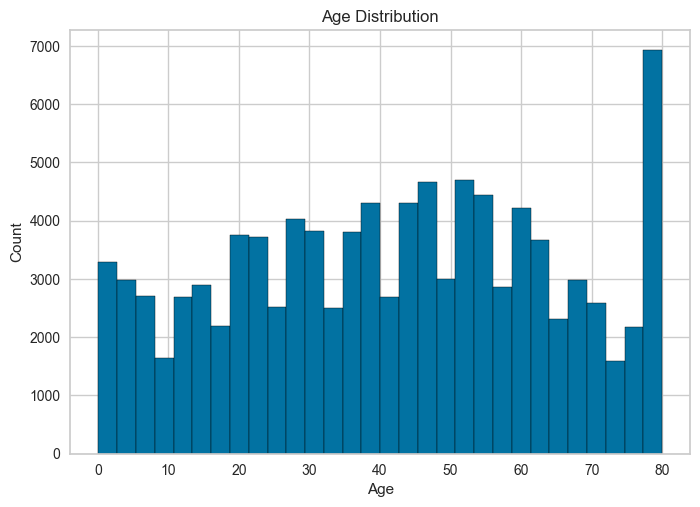

In [39]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

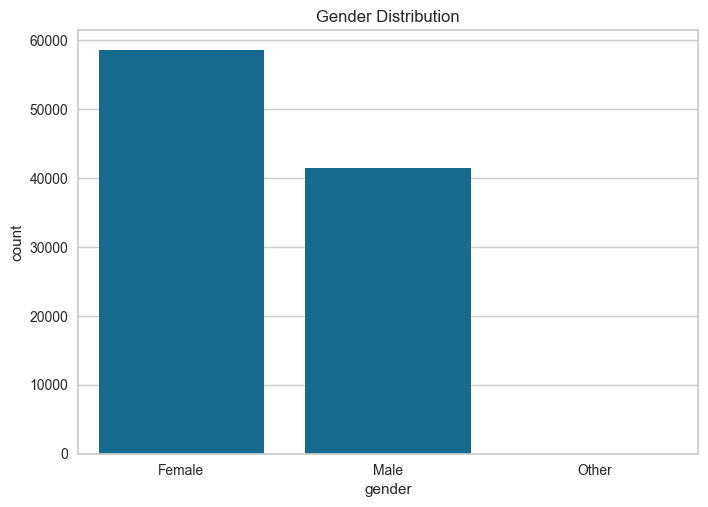

In [40]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

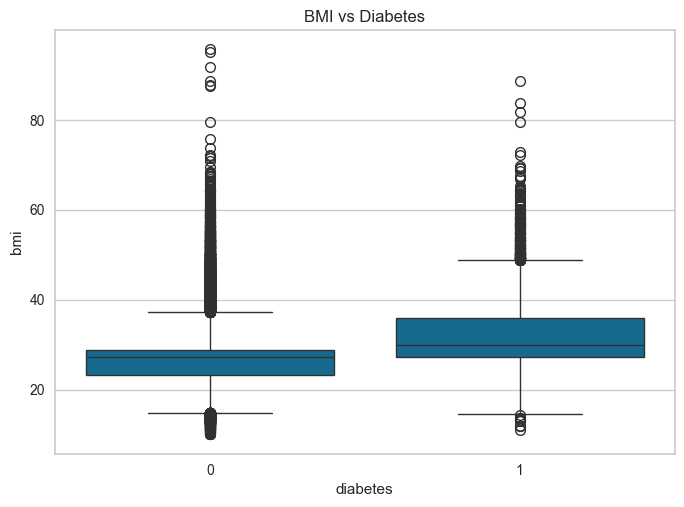

In [41]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

<Axes: >

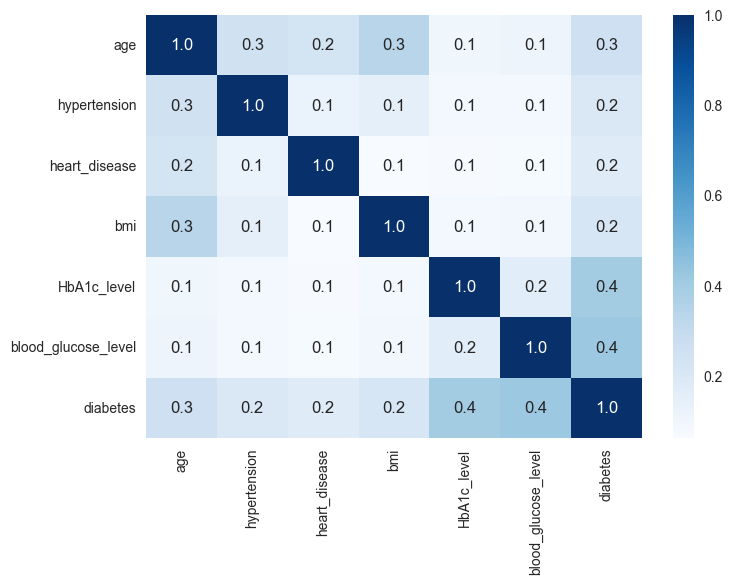

In [42]:
df = df.drop(["gender","smoking_history"], axis = 1)

sns.heatmap(df.corr(method = 'pearson'), annot=True, fmt=".1f",cmap = 'Blues')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 5.3 MB


In [44]:

from sklearn.utils import resample

# Separar las clases
data_class_0 = df[df['diabetes'] == 0]
data_class_1 = df[df['diabetes'] == 1]

# Submuestrear cada clase para que contengan la misma cantidad de instancias
data_class_0_sampled = resample(data_class_0, replace=False, n_samples=8500, random_state=42)
data_class_1_sampled = resample(data_class_1, replace=False, n_samples=8500, random_state=42)

# Combinar las muestras submuestreadas
df = pd.concat([data_class_0_sampled, data_class_1_sampled])

# Separar nuevamente x e y
x = df.drop('diabetes', axis=1)
y = df['diabetes']

print("Distribución balanceada de y:")
print(y.value_counts())


Distribución balanceada de y:
diabetes
0    8500
1    8500
Name: count, dtype: int64


In [45]:
# Seleccionar aleatoriamente 30,000 filas del dataset
#df = df.sample(n=30000, random_state=42)

In [46]:
df.shape

(17000, 7)

## Separación de datos

In [47]:
# seed sera nuestro valor para nuestro random state
seed = 42

# División de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed, stratify=y)
x_train, x_val,y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=seed, stratify=y_train)


# Entrenando el escalador
scaler = MinMaxScaler()
scaler.fit(x_train)

# Usando el escalador entrenado para transformar los datos
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)


In [48]:
x.shape

(17000, 6)

In [49]:
y_test.shape

(4250,)

In [50]:
x_val.shape

(3188, 6)

In [51]:
x_train.shape

(9562, 6)

In [52]:
x_test.shape

(4250, 6)

In [ ]:
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Random Forest',
    'Support Vector Machine',
    'AdaBoost',
    'Decision Tree'
]

# Modelos de Clasificación

classifierss = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(5),  # El 5 es el número de vecinos cercanos que queremos que halle
    RandomForestClassifier(random_state=seed),
    SVC(probability=True),
    AdaBoostClassifier(random_state=seed),
    DecisionTreeClassifier(random_state=seed)
]

## Voting en el entrenamiento

In [54]:
# Seed para la reproducibilidad
seed = 42

# Clasificadores
clf1 = LogisticRegression(random_state=seed)
clf2 = RandomForestClassifier(random_state=seed)
clf3 = KNeighborsClassifier(5)
clf4 = SVC(probability=True)
clf5 = AdaBoostClassifier(random_state=seed)
clf6 = GradientBoostingClassifier(random_state=seed)
clf7 = xgb.XGBClassifier(random_state=seed)
clf8 = HistGradientBoostingClassifier(random_state=seed)
clf9 = DecisionTreeClassifier(random_state=seed)

eclf = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('rf', clf2),
        ('KNN', clf3),
        ('SVC', clf4),
        ('AdaBoost', clf5),
        ('GradientBoost', clf6),
        ('XGBoost', clf7),
        ('HistGradientBoost', clf8),
        ('DecisionTree', clf9)
    ],
    voting='hard'
)

# Evaluar cada clasificador por separado
classifiers = [
    clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9
]

labels = [
    'Logistic Regression', 'Random Forest', 'KNN', 'Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'HistGradient Boosting', 'Decision Tree'
]

for clf, label in zip(classifiers, labels):
    scores = cross_val_score(clf, x_train_scaled, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.88 (+/- 0.01) [Logistic Regression]
Accuracy: 0.90 (+/- 0.01) [Random Forest]
Accuracy: 0.89 (+/- 0.01) [KNN]
Accuracy: 0.90 (+/- 0.01) [Support Vector Machine]
Accuracy: 0.91 (+/- 0.01) [AdaBoost]
Accuracy: 0.91 (+/- 0.00) [Gradient Boosting]
Accuracy: 0.90 (+/- 0.01) [XGBoost]
Accuracy: 0.90 (+/- 0.00) [HistGradient Boosting]
Accuracy: 0.87 (+/- 0.00) [Decision Tree]


In [55]:
socre_train = score_summary_test(names, classifierss)
socre_train

,Clasificador,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,88.80,0.96,0.88,0.89,0.89
1,Nearest Neighbors,88.94,0.96,0.89,0.89,0.89
2,Random Forest,90.47,0.97,0.90,0.91,0.90
3,Support Vector Machine,89.34,0.96,0.90,0.89,0.89
4,AdaBoost,91.67,0.98,0.93,0.90,0.92
5,Gradient Boosting,91.67,0.98,0.93,0.90,0.92
6,XGBoost,90.82,0.98,0.91,0.91,0.91
7,HistGradient Boosting,91.18,0.98,0.92,0.91,0.91
8,Decision Tree,88.94,0.89,0.88,0.90,0.89


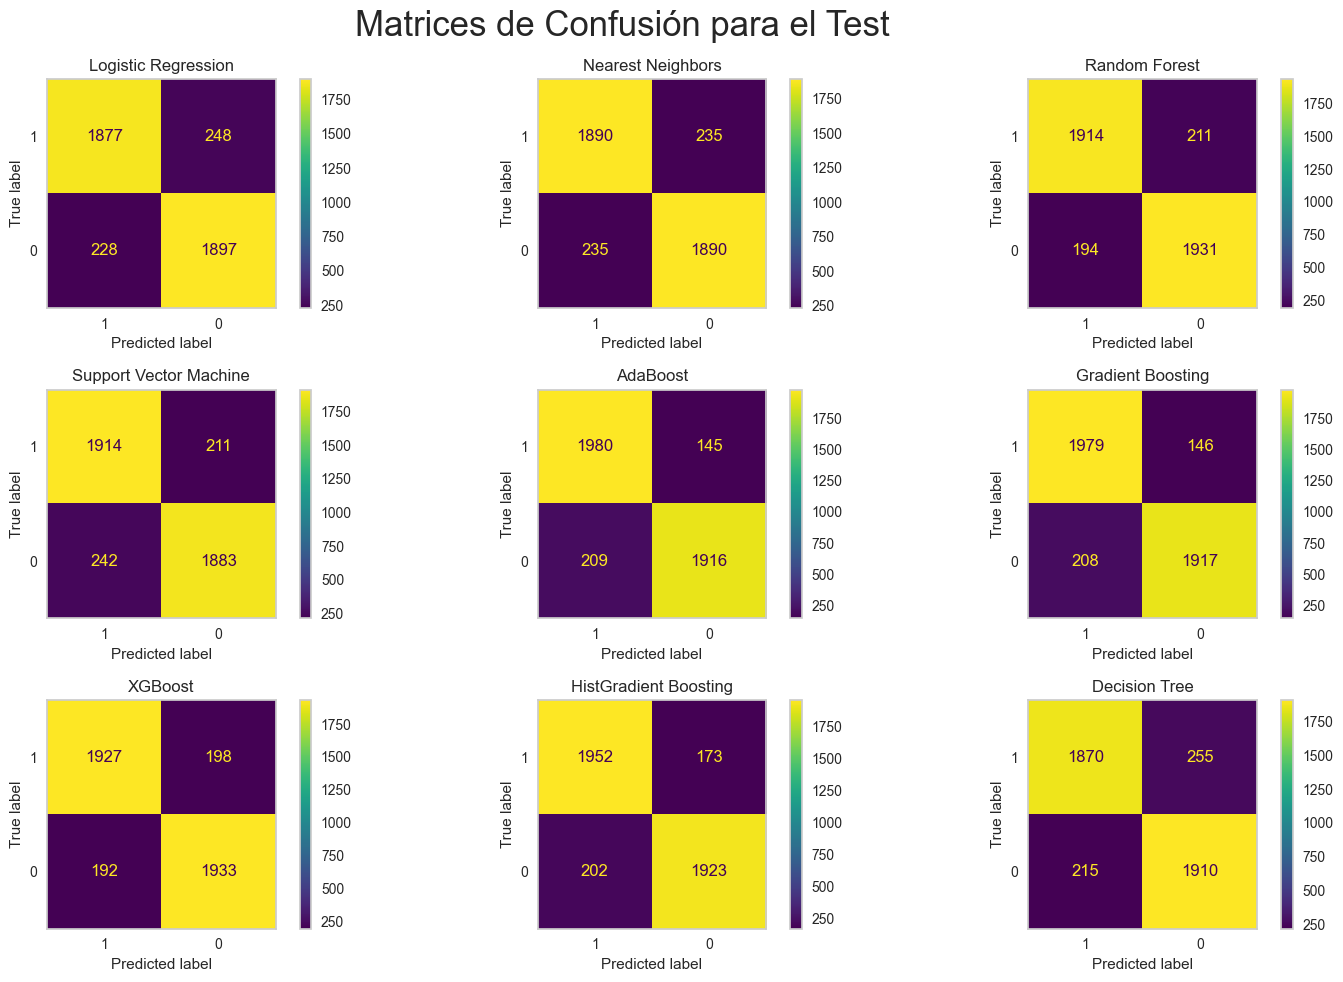

In [56]:
plot_conf_matrix_test(names, classifierss, 3, 3, 15, 10)

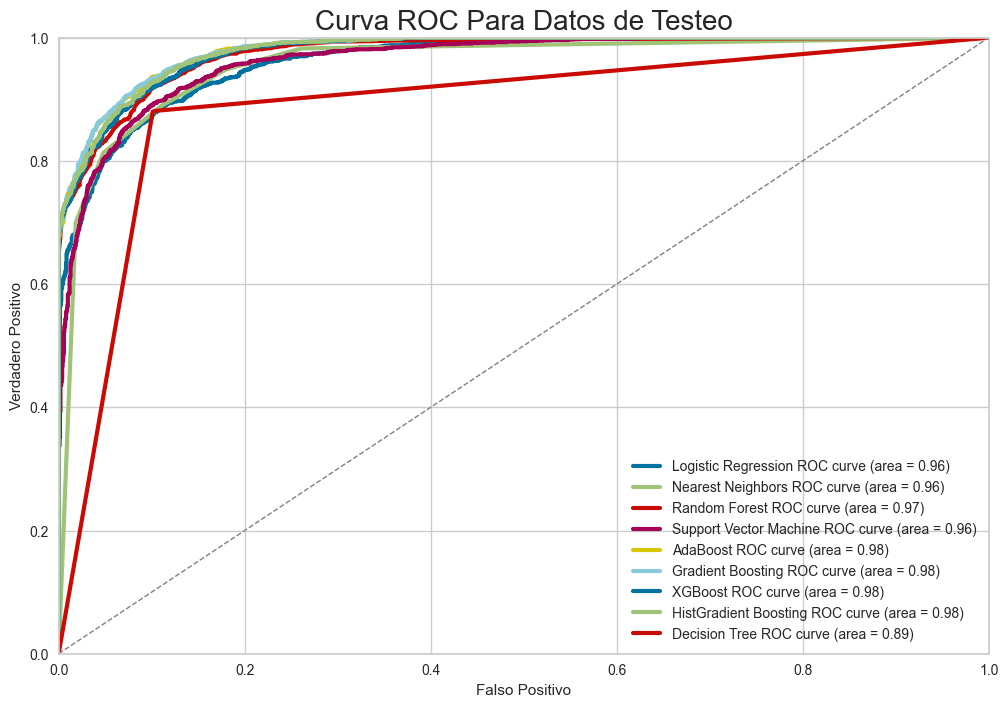

In [57]:
roc_auc_curve_test(names, classifierss)

## Validación

In [58]:
socre_val = score_summary_val(names, classifierss)
socre_val

,Clasificador,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,88.02,0.96,0.89,0.88,0.88
1,Nearest Neighbors,87.64,0.95,0.87,0.88,0.88
2,Random Forest,88.74,0.97,0.89,0.89,0.89
3,Support Vector Machine,88.74,0.96,0.91,0.87,0.89
4,AdaBoost,90.09,0.97,0.92,0.88,0.90
5,Gradient Boosting,89.74,0.97,0.92,0.88,0.90
6,XGBoost,88.77,0.97,0.90,0.88,0.89
7,HistGradient Boosting,89.08,0.97,0.90,0.88,0.89
8,Decision Tree,86.54,0.87,0.86,0.87,0.87


## Voting en la validación

In [59]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Seed para la reproducibilidad
seed = 42

# Clasificadores
clf1 = LogisticRegression(random_state=seed)
clf2 = RandomForestClassifier(random_state=seed)
clf3 = KNeighborsClassifier(5)
clf4 = SVC(probability=True)
clf5 = AdaBoostClassifier(random_state=seed)
clf6 = GradientBoostingClassifier(random_state=seed)
clf7 = xgb.XGBClassifier(random_state=seed)
clf8 = HistGradientBoostingClassifier(random_state=seed)
clf9 = DecisionTreeClassifier(random_state=seed)

eclf = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('rf', clf2),
        ('KNN', clf3),
        ('SVC', clf4),
        ('AdaBoost', clf5),
        ('GradientBoost', clf6),
        ('XGBoost', clf7),
        ('HistGradientBoost', clf8),
        ('DecisionTree', clf9)
    ],
    voting='hard'
)

# Evaluar cada clasificador por separado
classifiers = [
    clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9
]

labels = [
    'Logistic Regression', 'Random Forest', 'KNN', 'Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'HistGradient Boosting', 'Decision Tree'
]

for clf, label in zip(classifiers, labels):
    scores = cross_val_score(clf, x_val_scaled, y_val, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.88 (+/- 0.01) [Logistic Regression]
Accuracy: 0.88 (+/- 0.01) [Random Forest]
Accuracy: 0.88 (+/- 0.01) [KNN]
Accuracy: 0.88 (+/- 0.01) [Support Vector Machine]
Accuracy: 0.90 (+/- 0.01) [AdaBoost]
Accuracy: 0.90 (+/- 0.01) [Gradient Boosting]
Accuracy: 0.89 (+/- 0.01) [XGBoost]
Accuracy: 0.89 (+/- 0.01) [HistGradient Boosting]
Accuracy: 0.87 (+/- 0.01) [Decision Tree]


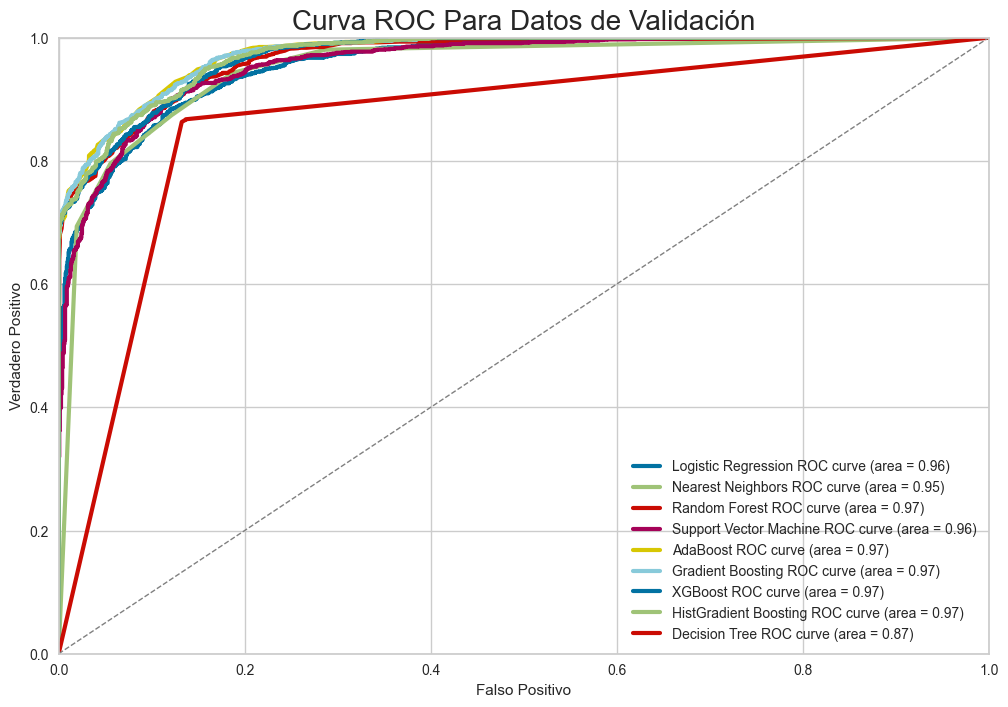

In [60]:
roc_auc_curve_val(names, classifierss)

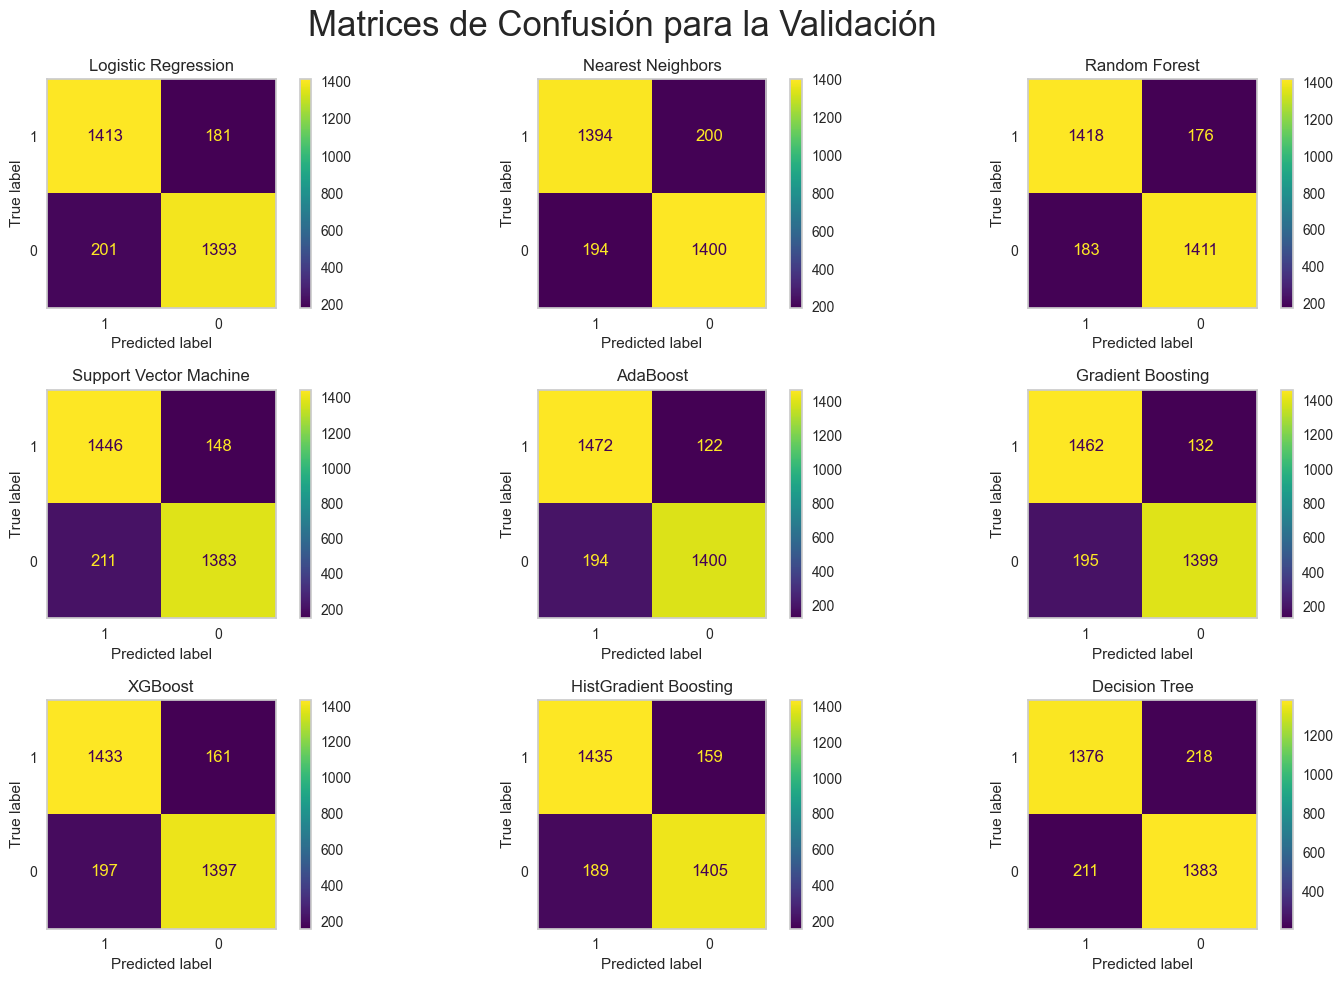

In [61]:
plot_conf_matrix_val(names, classifierss, 3, 3, 15, 10)

## Optimización

In [62]:
# Optimización

logistic_regresion = LogisticRegression(solver="liblinear", random_state=seed)

paramsrl = {
    'classifier__C': uniform(0.1, 10),
    'classifier__solver': ['liblinear', 'saga']
}

pipeline = Pipeline([

    ('scale', StandardScaler()),
    ('classifier', logistic_regresion)
])

rgs = RandomizedSearchCV(pipeline, param_distributions = paramsrl, n_iter = 10,
                         cv=7, scoring= 'accuracy', random_state=seed)
rgs.fit(x_train_scaled, y_train)
print(f"Mejores parámetros para la regrsion logistica (CV score=%0.3f):" % rgs.best_score_)
print(rgs.best_params_)

best_model_rgs = rgs.best_estimator_
best_model_rgs

Mejores parámetros para la regrsion logistica (CV score=0.885):
{'classifier__C': np.float64(0.6808361216819946), 'classifier__solver': 'saga'}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=np.float64(0.6808361216819946),
                                    random_state=42, solver='saga'))])

In [63]:
knn = KNeighborsClassifier(5)

# Definir los parámetros para la regresión logística
paramsknn = {
    'classifier__n_neighbors': randint(1, 20),
    'classifier__weights': ['uniform', 'distance']
}

# Crear el pipeline
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', knn)
])

# RandomizedSearchCV
kgs = RandomizedSearchCV(pipeline, param_distributions=paramsknn, n_iter=10,
                         cv=7, scoring='accuracy', random_state=seed)

kgs.fit(x_train_scaled, y_train)

print(f"Mejores parámetros para la regresión logística (CV score=%0.3f):" % kgs.best_score_)
print(kgs.best_params_)

best_model_knn = kgs.best_estimator_
best_model_knn


Mejores parámetros para la regresión logística (CV score=0.893):
{'classifier__n_neighbors': 12, 'classifier__weights': 'distance'}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=12, weights='distance'))])

In [64]:
# Definir el clasificador
random_forest = RandomForestClassifier(random_state=seed)

# Definir los parámetros para el Random Forest
params_rf = {
    'classifier__n_estimators': randint(100, 200),
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 10)
}

# Crear el pipeline
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', random_forest)
])

# RandomizedSearchCV
rfgs = RandomizedSearchCV(pipeline, param_distributions=params_rf, n_iter=10,
                          cv=7, scoring='accuracy', random_state=seed)

rfgs.fit(x_train_scaled, y_train)

print(f"Mejores parámetros para Random Forest (CV score=%0.3f):" % rfgs.best_score_)
print(rfgs.best_params_)

best_model_rf = rfgs.best_estimator_
best_model_rf


Mejores parámetros para Random Forest (CV score=0.909):
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 163}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=6,
                                        min_samples_split=3, n_estimators=163,
                                        random_state=42))])

In [65]:


# Definir el clasificador
svm = SVC(random_state=seed)

# Definir los parámetros para el SVM
params_svm = {
    'classifier__C': uniform(loc=0, scale=10),
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Crear el pipeline
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', svm)
])

# RandomizedSearchCV
svm_gs = RandomizedSearchCV(pipeline, param_distributions=params_svm, n_iter=10,
                           cv=7, scoring='accuracy', random_state=seed)
svm_gs.fit(x_train_scaled, y_train)

print(f"Mejores parámetros para SVM (CV score=%0.3f):" % svm_gs.best_score_)
print

best_model_svc = svm_gs.best_estimator_
best_model_svc

Mejores parámetros para SVM (CV score=0.902):


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 SVC(C=np.float64(6.1748150962771655), gamma='auto',
                     random_state=42))])

In [66]:
from sklearn.ensemble import AdaBoostClassifier

# Parámetros para AdaBoostClassifier
params_adaboost = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Crear el pipeline
pipeline_adaboost = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', AdaBoostClassifier(random_state=seed))
])

# RandomizedSearchCV para AdaBoostClassifier
adaboost_gs = RandomizedSearchCV(pipeline_adaboost, param_distributions=params_adaboost, n_iter=10, cv=7, scoring='accuracy', random_state=seed)
adaboost_gs.fit(x_train_scaled, y_train)

print(f"Mejores parámetros para AdaBoostClassifier (CV score=%0.3f):" % adaboost_gs.best_score_)
print(adaboost_gs.best_params_)

best_model_adaboost = adaboost_gs.best_estimator_
best_model_adaboost


Mejores parámetros para AdaBoostClassifier (CV score=0.911):
{'classifier__learning_rate': 1.0, 'classifier__n_estimators': 180}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(n_estimators=180, random_state=42))])

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

# Parámetros para GradientBoostingClassifier
params_gradientboost = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'classifier__max_depth': [3, 5, 10, 20]
}

# Crear el pipeline
pipeline_gradientboost = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=seed))
])

# RandomizedSearchCV para GradientBoostingClassifier
gb_gs = RandomizedSearchCV(pipeline_gradientboost, param_distributions=params_gradientboost, n_iter=10, cv=7, scoring='accuracy', random_state=seed)
gb_gs.fit(x_train_scaled, y_train)

print(f"Mejores parámetros para GradientBoostingClassifier (CV score=%0.3f):" % gb_gs.best_score_)
print(gb_gs.best_params_)

best_model_gb = gb_gs.best_estimator_
best_model_gb


Mejores parámetros para GradientBoostingClassifier (CV score=0.910):
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 51}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=51, random_state=42))])

In [68]:
import xgboost as xgb

# Parámetros para XGBoostClassifier
params_xgboost = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'classifier__max_depth': randint(3, 10)
}

# Crear el pipeline
pipeline_xgboost = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', xgb.XGBClassifier(random_state=seed))
])

# RandomizedSearchCV para XGBoostClassifier
xgb_gs = RandomizedSearchCV(pipeline_xgboost, param_distributions=params_xgboost, n_iter=10, cv=7, scoring='accuracy', random_state=seed)
xgb_gs.fit(x_train_scaled, y_train)

print(f"Mejores parámetros para XGBoostClassifier (CV score=%0.3f):" % xgb_gs.best_score_)
print(xgb_gs.best_params_)

best_model_xgb = xgb_gs.best_estimator_
best_model_xgb


Mejores parámetros para XGBoostClassifier (CV score=0.911):
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 70}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=70, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [69]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Parámetros para HistGradientBoostingClassifier
params_histgradientboost = {
    'classifier__max_iter': randint(50, 200),
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'classifier__max_leaf_nodes': randint(10, 50)
}

# Crear el pipeline
pipeline_histgradientboost = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', HistGradientBoostingClassifier(random_state=seed))
])

# RandomizedSearchCV para HistGradientBoostingClassifier
hgb_gs = RandomizedSearchCV(pipeline_histgradientboost, param_distributions=params_histgradientboost, n_iter=10, cv=7, scoring='accuracy', random_state=seed)
hgb_gs.fit(x_train_scaled, y_train)

print(f"Mejores parámetros para HistGradientBoostingClassifier (CV score=%0.3f):" % hgb_gs.best_score_)
print(hgb_gs.best_params_)

best_model_hgb = hgb_gs.best_estimator_
best_model_hgb


Mejores parámetros para HistGradientBoostingClassifier (CV score=0.902):
{'classifier__learning_rate': 0.01, 'classifier__max_iter': 51, 'classifier__max_leaf_nodes': 33}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 HistGradientBoostingClassifier(learning_rate=0.01, max_iter=51,
                                                max_leaf_nodes=33,
                                                random_state=42))])

In [70]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint



# Parámetros para DecisionTreeClassifier
params_decision_tree = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 10)
}

# Crear el pipeline
pipeline_decision_tree = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=seed))
])

# RandomizedSearchCV para DecisionTreeClassifier
dt_gs = RandomizedSearchCV(pipeline_decision_tree, param_distributions=params_decision_tree, n_iter=10, cv=7, scoring='accuracy', random_state=seed)
dt_gs.fit(x_train_scaled, y_train)

print(f"Mejores parámetros para DecisionTreeClassifier (CV score=%0.3f):" % dt_gs.best_score_)
print(dt_gs.best_params_)

best_model_dt = dt_gs.best_estimator_
best_model_dt


Mejores parámetros para DecisionTreeClassifier (CV score=0.898):
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 5}


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=8,
                                        min_samples_split=5,
                                        random_state=42))])

In [71]:
# Definir los clasificadores optimizados
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Random Forest',
    'Support Vector Machine',
    'AdaBoost',
    'Gradient Boosting',
    'XGBoost',
    'HistGradient Boosting',
    'Decision Tree',
    'Voting Classifier'
]

# Clasificadores Optimizados
classifiers_optim = [
    rgs.best_estimator_,           # Logistic Regression
    kgs.best_estimator_,           # Nearest Neighbors
    rfgs.best_estimator_,          # Random Forest
    svm_gs.best_estimator_,        # Support Vector Machine
    adaboost_gs.best_estimator_,   # AdaBoost
    gb_gs.best_estimator_,         # Gradient Boosting
    xgb_gs.best_estimator_,        # XGBoost
    hgb_gs.best_estimator_,        # HistGradient Boosting
    dt_gs.best_estimator_,          # Decision Tree
]

# Evaluar cada clasificador optimizado por separado
for clf, label in zip(classifiers_optim, names):
    scores = cross_val_score(clf, x_train_scaled, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.89 (+/- 0.01) [Logistic Regression]
Accuracy: 0.89 (+/- 0.01) [Nearest Neighbors]
Accuracy: 0.91 (+/- 0.01) [Random Forest]
Accuracy: 0.90 (+/- 0.01) [Support Vector Machine]
Accuracy: 0.91 (+/- 0.01) [AdaBoost]
Accuracy: 0.91 (+/- 0.01) [Gradient Boosting]
Accuracy: 0.91 (+/- 0.00) [XGBoost]
Accuracy: 0.90 (+/- 0.00) [HistGradient Boosting]
Accuracy: 0.90 (+/- 0.00) [Decision Tree]


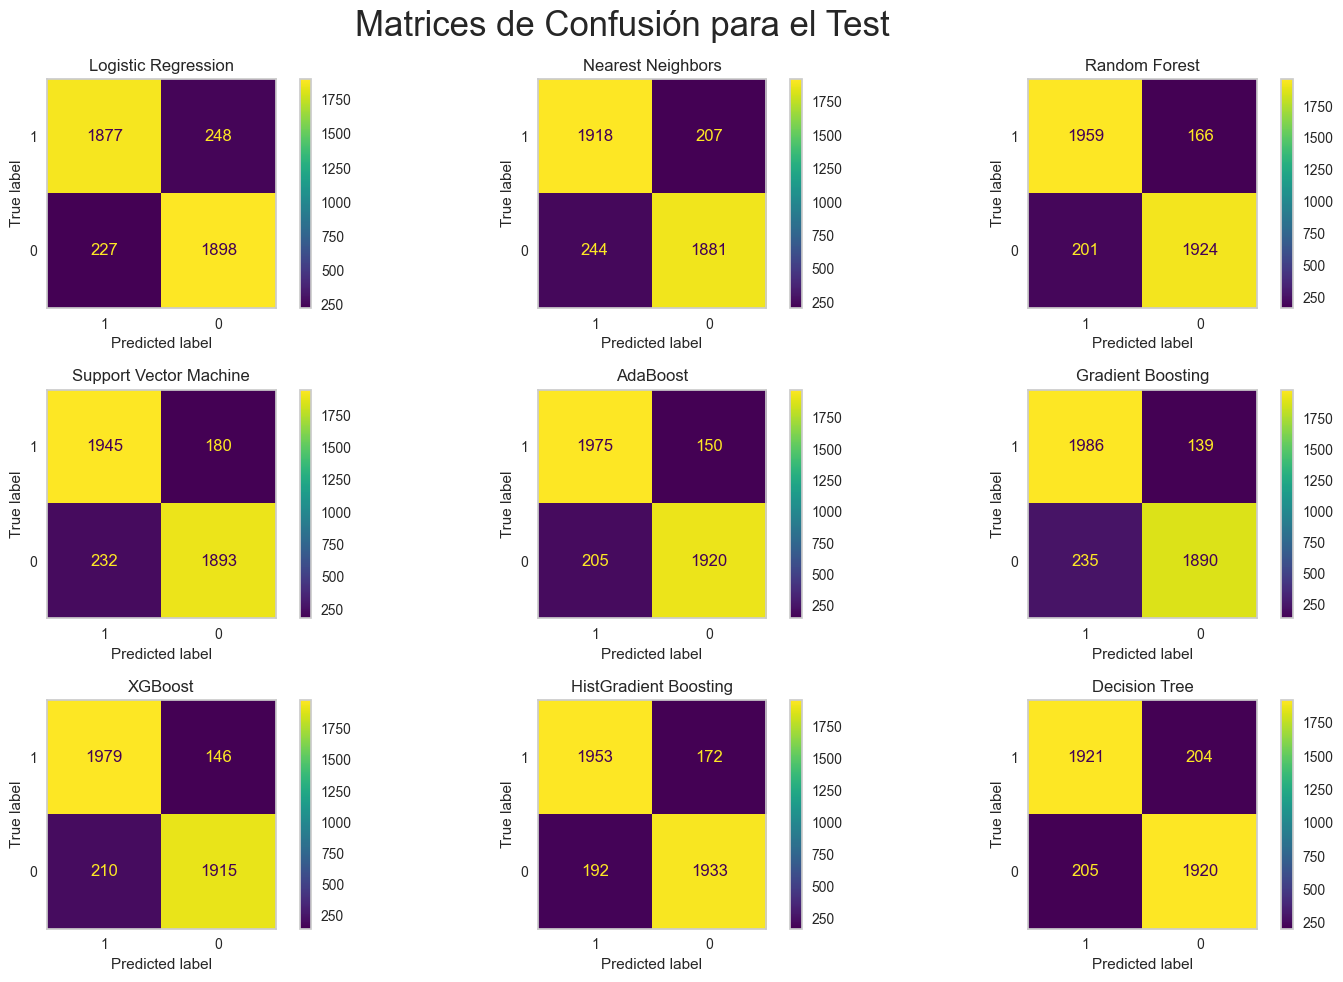

In [72]:
plot_conf_matrix_test(names, classifiers_optim, 3, 3, 15, 10)

In [73]:
socre_train_opt = score_summary_test(names, classifiers_optim)
socre_train_opt

,Clasificador,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,88.82,0.96,0.88,0.89,0.89
1,Nearest Neighbors,89.39,0.96,0.90,0.89,0.89
2,Random Forest,91.36,0.98,0.92,0.91,0.91
3,Support Vector Machine,90.31,0.97,0.92,0.89,0.90
4,AdaBoost,91.65,0.98,0.93,0.91,0.92
5,Gradient Boosting,91.20,0.98,0.93,0.89,0.91
6,XGBoost,91.62,0.98,0.93,0.90,0.92
7,HistGradient Boosting,91.44,0.98,0.92,0.91,0.91
8,Decision Tree,90.38,0.97,0.90,0.90,0.90


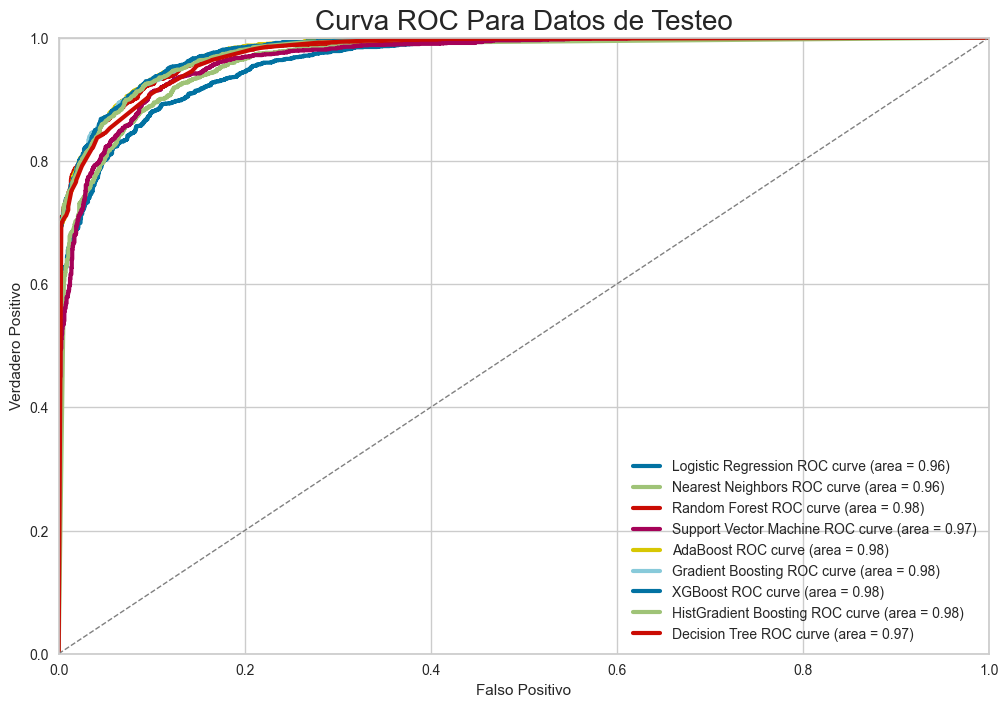

In [74]:
roc_auc_curve_test(names, classifiers_optim)

## Validación

In [75]:
socre_val_opt = score_summary_val(names, classifiers_optim)
socre_val_opt

,Clasificador,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,87.83,0.96,0.88,0.87,0.88
1,Nearest Neighbors,88.30,0.96,0.89,0.88,0.88
2,Random Forest,89.55,0.97,0.91,0.88,0.90
3,Support Vector Machine,88.93,0.96,0.91,0.87,0.89
4,AdaBoost,89.84,0.97,0.92,0.88,0.90
5,Gradient Boosting,89.90,0.97,0.93,0.88,0.90
6,XGBoost,89.68,0.97,0.92,0.88,0.90
7,HistGradient Boosting,89.43,0.97,0.91,0.89,0.90
8,Decision Tree,89.24,0.97,0.90,0.89,0.89


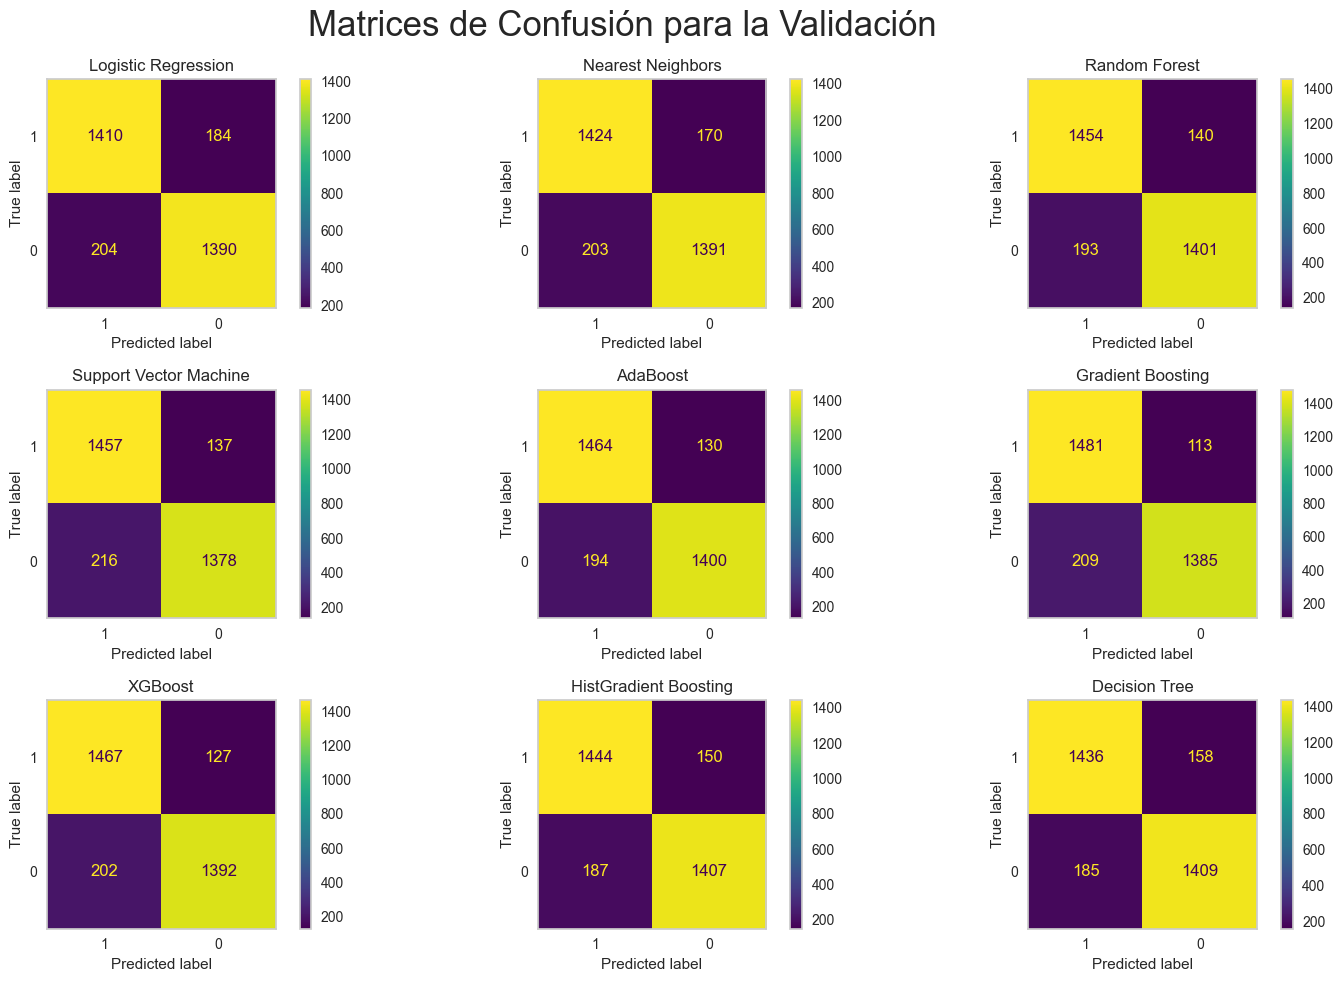

In [76]:
plot_conf_matrix_val(names, classifiers_optim, 3, 3, 15, 10)

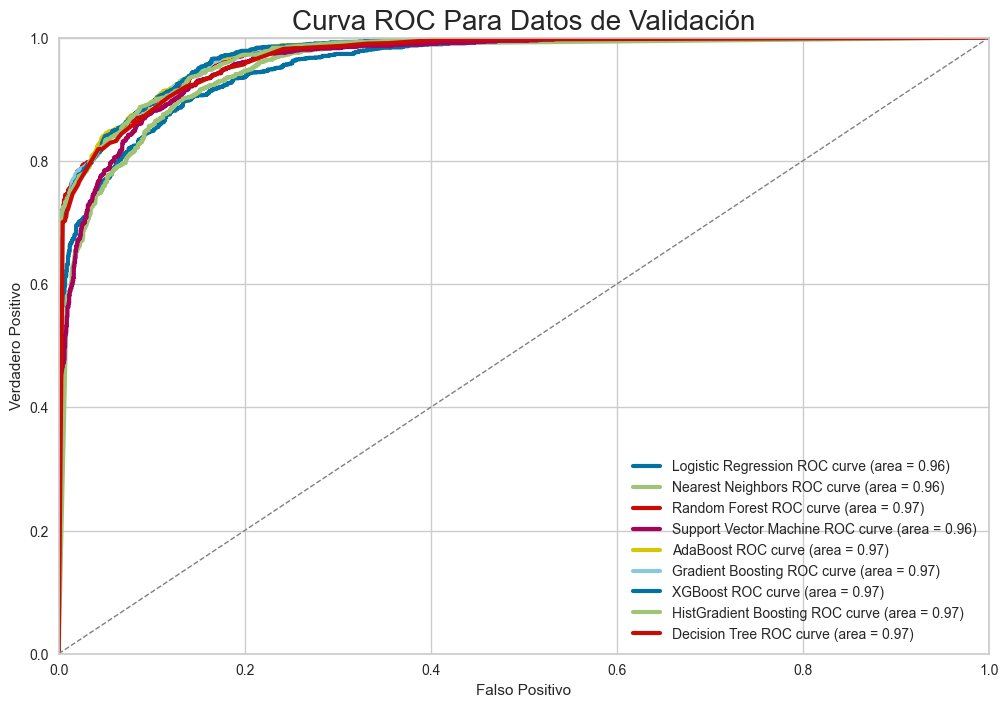

In [77]:
roc_auc_curve_val(names, classifiers_optim)

## Aplicaión de Metricas de Clasificación Multiple

## Para el Test

In [78]:
from sklearn.metrics import f1_score

def prepare_and_evaluate_with_classifiers(names, classifiers):

    results = []

    for name, clf in zip(names, classifiers):
        clf.fit(x_train_scaled, y_train)
        pred = clf.predict(x_test_scaled)

        f1_micro = f1_score(y_test, pred, average='micro')
        f1_macro = f1_score(y_test, pred, average='macro')
        f1_weighted = f1_score(y_test, pred, average='weighted')

        results.append({
            'Clasificador': name,
            'F1 Micro': f1_micro,
            'F1 Macro': f1_macro,
            'F1 Weighted': f1_weighted
        })

    return pd.DataFrame(results)


metrics = prepare_and_evaluate_with_classifiers(names, classifiers_optim)
metrics


,Clasificador,F1 Micro,F1 Macro,F1 Weighted
0,Logistic Regression,0.888235,0.888233,0.888233
1,Nearest Neighbors,0.893882,0.893874,0.893874
2,Random Forest,0.913647,0.913641,0.913641
3,Support Vector Machine,0.903059,0.903044,0.903044
4,AdaBoost,0.916471,0.916457,0.916457
5,Gradient Boosting,0.912000,0.911955,0.911955
6,XGBoost,0.916235,0.916216,0.916216
7,HistGradient Boosting,0.914353,0.914351,0.914351
8,Decision Tree,0.903765,0.903765,0.903765


## Para la Validación

In [79]:
from sklearn.metrics import f1_score

def prepare_and_evaluate_with_classifiers( names, classifiers):

    results = []


    for name, clf in zip(names, classifiers):
        clf.fit(x_train_scaled, y_train)
        pred = clf.predict(x_val_scaled)

        f1_micro = f1_score(y_val, pred, average='micro')
        f1_macro = f1_score(y_val, pred, average='macro')
        f1_weighted = f1_score(y_val, pred, average='weighted')

        results.append({
            'Clasificador': name,
            'F1 Micro': f1_micro,
            'F1 Macro': f1_macro,
            'F1 Weighted': f1_weighted
        })

    return pd.DataFrame(results)


metrics = prepare_and_evaluate_with_classifiers(names, classifiers_optim)
metrics


,Clasificador,F1 Micro,F1 Macro,F1 Weighted
0,Logistic Regression,0.878294,0.878289,0.878289
1,Nearest Neighbors,0.882999,0.882986,0.882986
2,Random Forest,0.895546,0.895517,0.895517
3,Support Vector Machine,0.889272,0.889204,0.889204
4,AdaBoost,0.898369,0.898328,0.898328
5,Gradient Boosting,0.898996,0.898905,0.898905
6,XGBoost,0.896801,0.896743,0.896743
7,HistGradient Boosting,0.894291,0.894277,0.894277
8,Decision Tree,0.892409,0.892401,0.892401


## Curva de aprendizaje

In [80]:
#df = df.sample(n=5000, random_state=42)

#x1 = df[["age","hypertension","heart_disease","bmi","HbA1c_level","blood_glucose_level"]]
#y1 = df["diabetes"]

Ada_Boosting = AdaBoostClassifier(random_state=seed)

In [81]:
#plot_learning_curves(Ada_Boosting, x1, y1)

## Seleccion de Caracteristicas

In [82]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

# Escalador y pipeline
scaler = StandardScaler()
pipeline = make_pipeline(scaler, Ada_Boosting)
modelFit = pipeline.fit(x_train_scaled, y_train)
y_pred = pipeline.predict(x_test_scaled)

# Calcular nuevas métricas
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Almacenar resultados
resultado_test = {
    'Model': Ada_Boosting,
    'Parameters': pipeline,
    'Accuracy': accuracy,
    'ROC_AUC': roc_auc,
    'Recall': recall,
    'Precision': precision,
    'F1': f1,
}

print(resultado_test)


{'Model': AdaBoostClassifier(random_state=42), 'Parameters': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))]), 'Accuracy': 0.9167058823529411, 'ROC_AUC': np.float64(0.9167058823529413), 'Recall': np.float64(0.9167058823529411), 'Precision': np.float64(0.9170842080367876), 'F1': np.float64(0.9166869896143646)}


In [83]:
importancia=Ada_Boosting.feature_importances_

In [84]:
#Organizar los índices de mayor a menor de acuerdo con su importancia
indx_org=np.argsort(importancia)[::-1][:10] #10 características más relevantes
ejex=range(len(importancia[:10]))
feature_names=x.columns
etiqueta=np.array(feature_names)[indx_org]

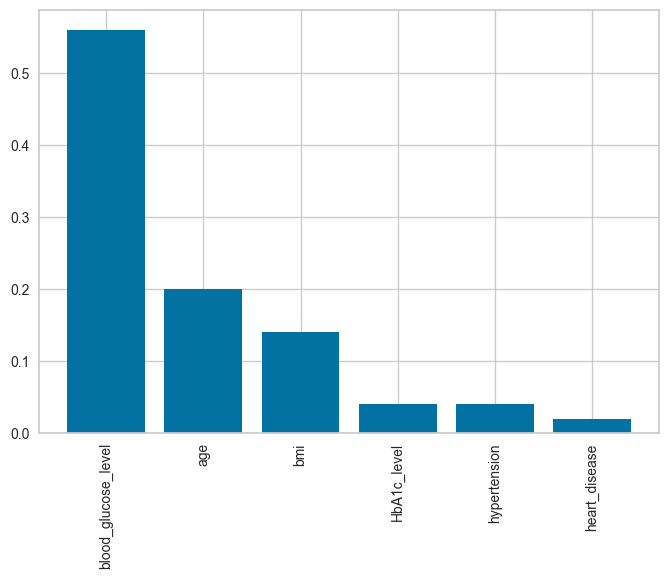

In [85]:
plt.bar(ejex,importancia[indx_org],tick_label=etiqueta)
plt.xticks(rotation=90)
plt.show()

## Selectk Best

In [86]:
k=6  #6 Número de características a seleccionar
selector = SelectKBest(score_func = mutual_info_classif, k=k)
selector.fit(x_train_scaled, y_train)
mask = selector.get_support()
new_x_train = x_train[x.columns[mask]] # Columnas definidas por el selector de características: Mayor depencia entre X y Y
new_x_test = x_test[x.columns[mask]]

In [87]:
mask

array([ True,  True,  True,  True,  True,  True])

In [88]:
new_x_train.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

## Metodo Wrapper

In [89]:
#Usando Ada Boosting
rfe = RFE(estimator=AdaBoostClassifier(),n_features_to_select=8, step=1)
X_trans = rfe.fit(x, y)
rfe.get_support(True)

array([0, 1, 2, 3, 4, 5])

In [90]:
keep_list=rfe.get_support() # Listado True-False
columns_to_remove = x.columns.values[np.logical_not(keep_list)]
X_filter=x.drop(columns=columns_to_remove)

In [91]:
X_filter.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

## Metodo Embebidos

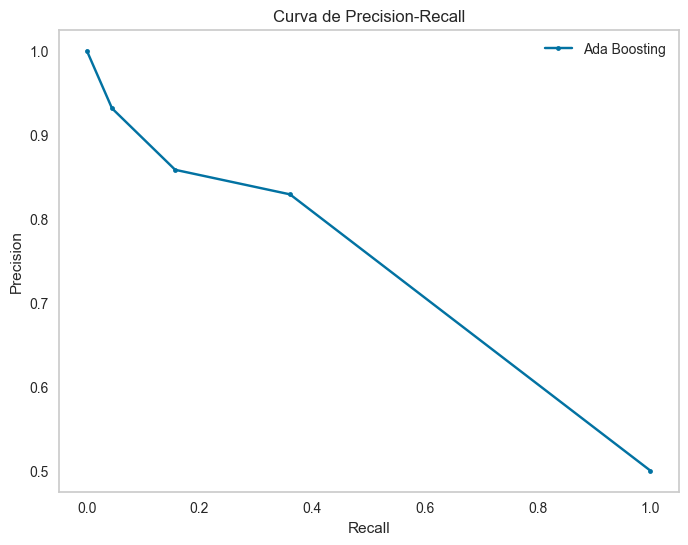

In [92]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler

# Entrenar el modelo
clf = AdaBoostClassifier(random_state=seed)
clf.fit(x_train, y_train)

# Predecir probabilidades
y_scores = clf.predict_proba(x_test_scaled)[:, 1]

# Calcular precisión y exhaustividad para diferentes umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plotear la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Ada Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precision-Recall')
plt.legend()
plt.grid()
plt.show()


In [93]:
ada_pred = adaboost_gs.predict_proba(x_test_scaled)

import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
from itertools import cycle



def plot_pr_curve(y, confidence):
    # Ajustar labels_order según tus clases
    labels_order = sorted(list(set(y)))  # Extraer todas las clases presentes en y
    y_bin = label_binarize(y, classes=labels_order)
    n_classes = y_bin.shape[1]
    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], confidence[:, i])
        average_precision[i] = average_precision_score(y_bin[:, i], confidence[:, i])

    lines = []
    labels = []
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

    for i, color in zip(range(n_classes), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                      ''.format(i, average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Extension of Precision-Recall curve to multi-class')
    plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

    plt.show()



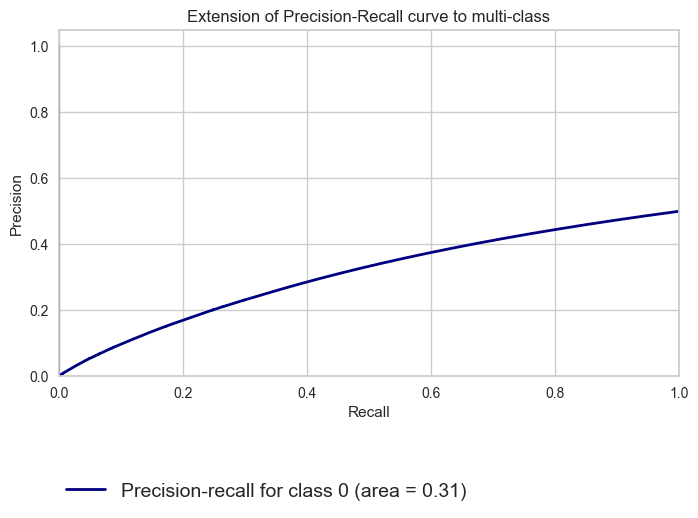

In [94]:
plot_pr_curve(y_test, ada_pred)

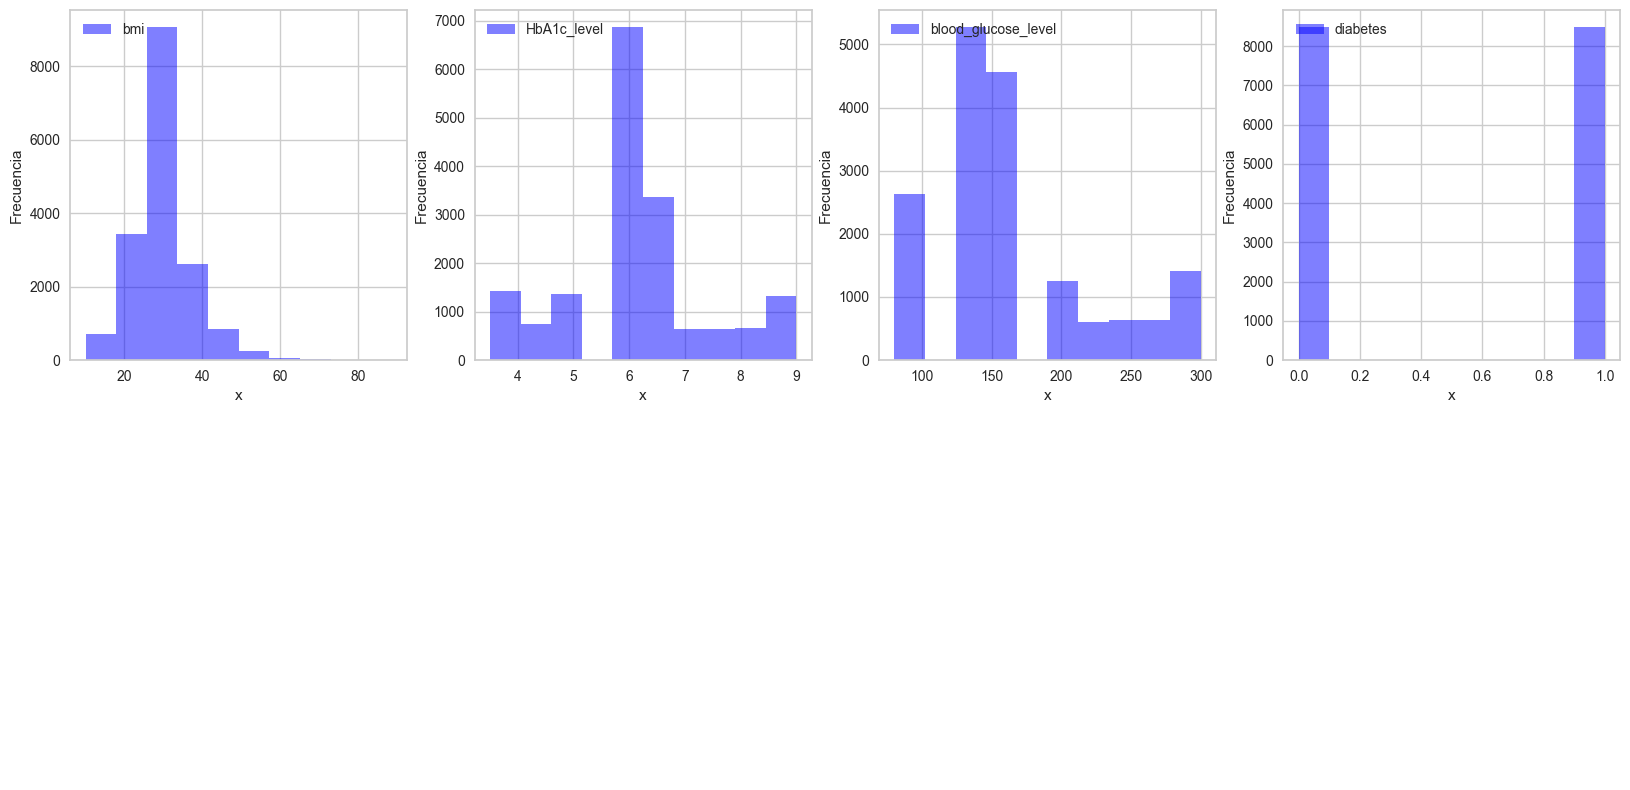

In [95]:
# Definir número de gráficos por columna
ncols = 4
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10)) # ancho*largo


counter = 3
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot
        if counter < len(df.columns):

            ax.hist(df[df.columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(df.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('Frecuencia')
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Elimina eje cuando no hay más datos disponibles
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [96]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title,x,y,factor,axes=None, ylim=[0,1], cv=None,n_jobs=None,scoring=None,train_sizes=np.linspace(0.1, 1.0, 10)):

#     if axes is None:
#         _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel(scoring)

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        x,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        random_state = 42,
        #random_state = 42+int(max_key[2]), #Siempre misma separación: mejor separación
    )
    train_scores_mean = np.mean(train_scores, axis=1)*factor
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)*factor
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)*factor
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    return plt

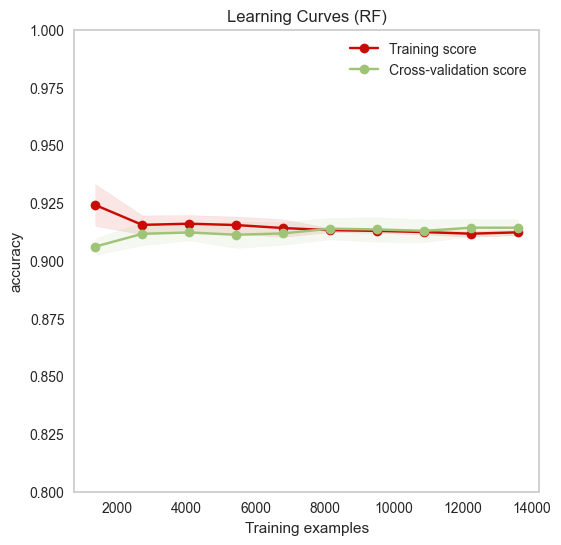

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
# Asegúrate de importar también cualquier otra librería que necesites, como plot_learning_curve

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
title = "Learning Curves (AdaBoost)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)
estimator = adaboost_gs
factor = 1  # -1
plot_learning_curve(
    estimator,
    title,
    x,
    y,
    factor,
    axes=axes,  # axes[:,0],
    ylim=(0.8, 1.0),
    cv=cv,
    n_jobs=4,
    scoring='accuracy'
)

plt.show()


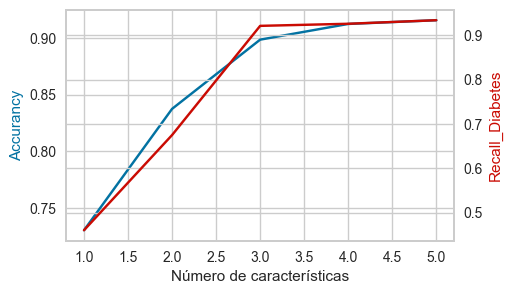

In [98]:
from sklearn.feature_selection import mutual_info_classif


# Listas para almacenar los resultados
acc1rf=[]
acc2rf=[]

for k in range(1,x.shape[1],1):

    # Selección de características
    selector = SelectKBest(score_func = mutual_info_classif, k=k)
    selector.fit(x_train, y_train)
    mask = selector.get_support()
    new_x_train3 = x_train[x.columns[mask]] # Columnas definidas por el seleccionador de características
    new_x_test3 = x_test[x.columns[mask]]
    new_x_val3 = x_val[x.columns[mask]]

    # Entrenamiento usando Ridge Regression o Random Forest
    rdg = adaboost_gs.fit(new_x_train3, y_train)

    # Métricas para regresión
    y_pred3_test = rdg.predict(new_x_test3)        # Entranando los datos de prueba
    acc1 = accuracy_score(y_test, y_pred3_test)
    acc1rf.append(acc1)
    rec1 = recall_score(y_test, y_pred3_test, average = None)[1]
    acc2rf.append(rec1)

k = [i for i in range(1,x.shape[1],1)]

fig, ax1 = plt.subplots( figsize=(5,3))

# Curva de y1 en el eje izquierdo
ax1.plot(k, acc1rf, 'b-')
ax1.set_xlabel('Número de características')
ax1.set_ylabel('Accurancy', color='b')
ax1.grid(True)
ax2 = ax1.twinx() # Segundo eje de valores y

# Curva de y2 en el eje derecho
ax2.plot(k, acc2rf, 'r-')
ax2.set_ylabel('Recall_Diabetes', color='r')

plt.show()

## Voting Classifier Test

In [99]:
from sklearn.ensemble import VotingClassifier

# Definir el VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('Logistic Regression', rgs.best_estimator_),
        ('Nearest Neighbors', kgs.best_estimator_),
        ('Random Forest', rfgs.best_estimator_),
        ('Support Vector Machine', svm_gs.best_estimator_),
        ('AdaBoost', adaboost_gs.best_estimator_),
        ('Gradient Boosting', gb_gs.best_estimator_),
        ('XGBoost', xgb_gs.best_estimator_),
        ('HistGradient Boosting', hgb_gs.best_estimator_),
        ('Decision Tree', dt_gs.best_estimator_)
    ],
    voting='hard'
)

# Entrenar el VotingClassifier
voting_clf.fit(x_train_scaled, y_train)

# Predecir con el VotingClassifier
y_pred = voting_clf.predict(x_test_scaled)

# Evaluar las métricas
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Almacenar resultados
resultado_voting = {
    'Model': 'VotingClassifier',
    'Parameters': voting_clf,
    'Accuracy': accuracy,
    'ROC_AUC': roc_auc,
    'Recall': recall,
    'Precision': precision,
    'F1': f1,
}

resultado_voting


{'Model': 'VotingClassifier',
 'Parameters': VotingClassifier(estimators=[('Logistic Regression',
                               Pipeline(steps=[('scale', StandardScaler()),
                                               ('classifier',
                                                LogisticRegression(C=np.float64(0.6808361216819946),
                                                                   random_state=42,
                                                                   solver='saga'))])),
                              ('Nearest Neighbors',
                               Pipeline(steps=[('scale', StandardScaler()),
                                               ('classifier',
                                                KNeighborsClassifier(n_neighbors=12,
                                                                     weights='distance'))])),
                              ('Random Forest',
                               Pi...
                              ('HistGr

In [104]:
# Definir el VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('Logistic Regression', rgs.best_estimator_),
        ('Nearest Neighbors', kgs.best_estimator_),
        ('Random Forest', rfgs.best_estimator_),
        ('Support Vector Machine', svm_gs.best_estimator_),
        ('AdaBoost', adaboost_gs.best_estimator_),
        ('Gradient Boosting', gb_gs.best_estimator_),
        ('XGBoost', xgb_gs.best_estimator_),
        ('HistGradient Boosting', hgb_gs.best_estimator_),
        ('Decision Tree', dt_gs.best_estimator_)
    ],
    voting='hard'
)

# Entrenar el VotingClassifier
voting_clf.fit(x_val_scaled, y_val)

# Predecir con el VotingClassifier
y_pred = voting_clf.predict(x_val_scaled)

# Evaluar las métricas
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred, multi_class='ovr')
recall = recall_score(y_val, y_pred, average='weighted')
precision = precision_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Almacenar resultados
resultado_voting = {
    'Model': 'VotingClassifier',
    'Parameters': voting_clf,
    'Accuracy': accuracy,
    'ROC_AUC': roc_auc,
    'Recall': recall,
    'Precision': precision,
    'F1': f1,
}

resultado_voting

{'Model': 'VotingClassifier',
 'Parameters': VotingClassifier(estimators=[('Logistic Regression',
                               Pipeline(steps=[('scale', StandardScaler()),
                                               ('classifier',
                                                LogisticRegression(C=np.float64(0.6808361216819946),
                                                                   random_state=42,
                                                                   solver='saga'))])),
                              ('Nearest Neighbors',
                               Pipeline(steps=[('scale', StandardScaler()),
                                               ('classifier',
                                                KNeighborsClassifier(n_neighbors=12,
                                                                     weights='distance'))])),
                              ('Random Forest',
                               Pi...
                              ('HistGr